# 微博数据分析

数据包含微博 500 个用户 2020-1-1 到 2020-3-31 号微博正文，包含字段：微博id，微博正文，原始图片url，被转发微博原始图片url，是否为原创微博，微博视频url，发布位置，发布时间，发布工具，点赞数，转发数，评论数


## 导入库/参数设置

In [1]:
import os
import pandas as pd
from tqdm import tqdm
from snownlp import SnowNLP
from wordcloud import WordCloud
from matplotlib import pyplot as plt

from clean_data import WeiboPreprocess 

In [2]:
start_date = "2020-1-20"
font_path = "../data/Microsoft YaHei Mono.ttf"
post_data_path = "../data/user_data"
stop_words_path = "../data/dictionary/stopwords.txt"
positive_words_path = "../data/dictionary/ntusd-positive.txt"
negative_words_path = "../data/dictionary/ntusd-negative.txt"
keyword_to_delete = ["微博之夜", "关注并转发", "翻转开运卡", "我的新年心愿已发出", "由于作者设置"]

In [3]:
#显示所有列
pd.set_option('display.max_columns', None)
#显示所有行
pd.set_option('display.max_rows', 100)
#设置value的显示长度为100，默认为50
pd.set_option('max_colwidth',200)

## 获取数据

In [4]:
def get_user_data(file_path):
    total = pd.DataFrame()
    # read all xlsx files
    for root, dirs, files in tqdm(os.walk(file_path)):
        # merge all post
        for file in files:
            df = pd.read_csv(os.path.join(root, file))
            df.drop(columns=["微博id", "原始图片url", "被转发微博原始图片url", "微博视频url", "发布位置", "发布工具"], inplace=True)
            total = total.append(df)
    total.columns = ["post", "is_original", "time", "like", "repost", "comment"]
    total["time"] = pd.to_datetime(total["time"]).dt.date
    total.sort_values("time", inplace=True)
    total.reset_index(drop=True, inplace=True)
    # concatenate posts by date
    # total = total.groupby("time")["post"].sum()
    return total

## 查看数据基本信息

In [5]:
data = get_user_data(post_data_path)
# data.head(60)

501it [00:06, 79.85it/s]


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11662 entries, 0 to 11661
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   post         11662 non-null  object
 1   is_original  11662 non-null  bool  
 2   time         11662 non-null  object
 3   like         11662 non-null  int64 
 4   repost       11662 non-null  int64 
 5   comment      11662 non-null  int64 
dtypes: bool(1), int64(3), object(2)
memory usage: 467.1+ KB


In [ ]:
data[data["is_original"]==True]

## 每日发布微博数量分布图

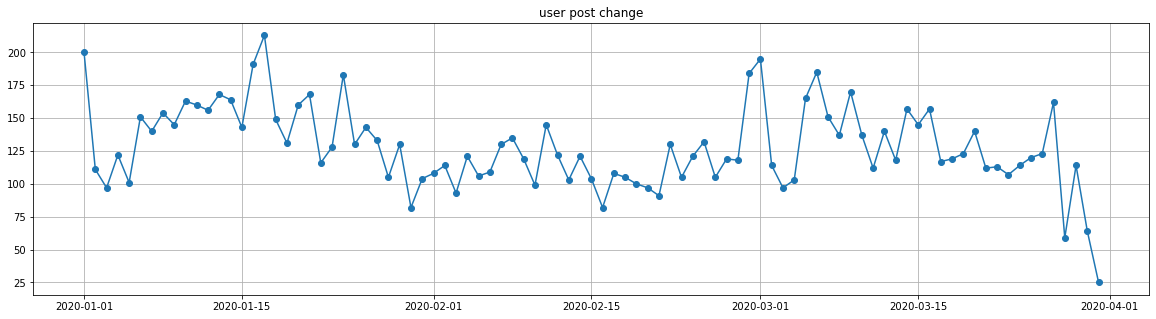

In [8]:
fig_post, ax_post = plt.subplots(figsize=(20, 5))
ax_post.set_title("user post change")
ax_post.plot(data.groupby("time").count()["post"], "o-")
ax_post.grid()
plt.savefig("../data/chart_pres_data/user_post_change.png", dpi=400, bbox_inches='tight')

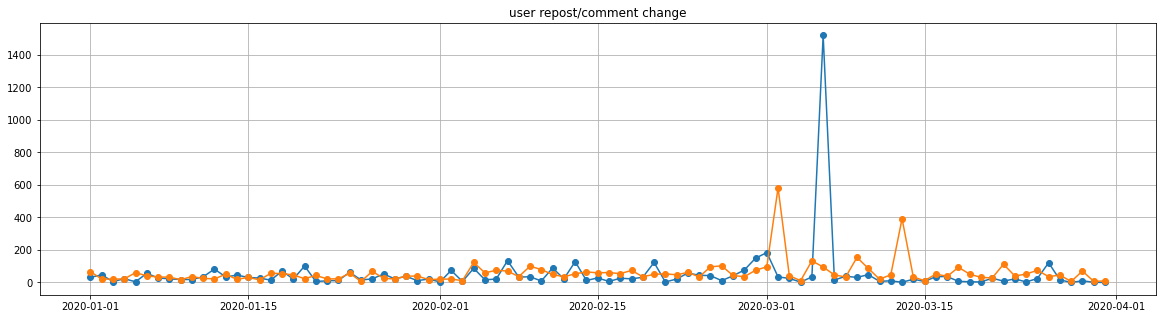

In [9]:
fig_other, ax_other = plt.subplots(figsize=(20, 5))
ax_other.set_title("user repost/comment change")
ax_other.plot(data.groupby("time").sum()[["repost", "comment"]], "o-")
ax_other.grid()
plt.savefig("../data/chart_pres_data/user_repost_comment_change.png", dpi=400, bbox_inches='tight')

In [7]:
data.sort_values(by="repost", ascending=False)

,post,is_original,time,like,repost,comment
8550,转发理由:而且！没有限制幼女的年龄啊！！！！我艹他野爹！！！！！！！和幼女发生性关系了，还能有情节不严重的？？？敢情你只要年纪小就可以“偶尔”性侵幼女，而不需要付出代价？？？？\n原始用户: Grandma_Bear\n转发内容: 刚刚看到了一个信息根据2013年出台的《关于依法惩治性侵害未成年人犯罪的意见》第27条 原图,False,2020-03-06,4,1421,22
6609,转发理由://@流民君 ://@腐女子的本愿 : //@喝莲子羹降鸡血马甲 ://@盐壳8星寸的大橘猫 ://@长梦君归 ://@好像没名字想改的汤圆 :神奇//@三叶草yumi鸿运当头OuO :卧槽//@CV3_Saratoga_Mk-II : 草？有点意思//@月下月影_ : //@一之瀬姬月 : 愿这个视频一直在不同的人手里流传下\n原始用户: 斩首之邀\n转发内容: 我不允许还没有...,False,2020-02-20,1,101,0
5928,转发理由:爷吐了//@惊风乱飐芙蓉水_: //@Sebby身上的展展://@马修_MIDSHIPMAN:一刀切懒政就是第一个新闻里所说的//@红鲤蛆与绿鲤蛆与驴:同一天，同一个号发的。讽刺小说都不敢这\n原始用户: 踏清雪寻你雅\n转发内容: 新闻对比看，，，老百姓的心哇凉哇凉的，，，，，， [组图共2张]原图,False,2020-02-13,0,99,0
5210,咱家如何打舞立方 油炸砂糖桔要吃嘛的微博视频,True,2020-02-07,62,99,41
11226,转发理由:哈哈哈哈//@耳可搞: //@Vozzly厨:@文学少女白衣_哭三变 //@怜兮Rency://@黒羽莉夏:哈哈哈//@五风普洱: 快乐//@希冀_烟波钓徒: //@盏深://@钨钢空气开关: 柴犬舔暴怒柴犬的笑死我//@酿克酿可: 狗勾\n原始用户: 当时我就震惊了\n转发内容: 狗子迷惑行为大赏哈哈哈哈哈哈真的是每一只狗子都好好笑up主：龙馍馍（已授权）当时我就震惊了的微博视频,False,2020-03-26,1,96,0
...,...,...,...,...,...,...
4016,转发理由:我先马了\n原始用户: VC大魔王啊\n转发内容: 这几天是不是很无聊？贴心的我，给你们收集好了【100部】剧！码住慢慢看吧～ #时尚穿搭# 也可以康康我 [组图共9张]原图,False,2020-01-27,0,0,0
4017,分享图片 安阳·内黄县 显示地图原图,True,2020-01-27,1,0,1
4018,转发理由:我继续马\n原始用户: 丸子哥在吗-\n转发内容: 得亏我爱的迫降还没看但是也就10集 现在还剩下6集待看 哭你们还有没有好看的电影电视剧的推啊,False,2020-01-27,0,0,0
4019,转发理由:12集一口气看完了，啥时候在更新啊\n原始用户: -程陌渊-\n转发内容: #三生三世枕上书# 【枕上书】第七集白凤九X东华帝君 迪丽热巴X高伟光帝君他很好，我和他，没有缘分罢了。老东华你家狐狸跑了 [组图共9张]原图,False,2020-01-27,0,0,0


## 微博正文内容预处理

In [10]:
# 文本清洗/分词
data = data[~data["post"].str.contains("|".join(keyword_to_delete))]
data["post"] = data["post"].apply(lambda x: x.strip())
data = data[data["post"].str.len() > 3]
preprocess = WeiboPreprocess()
data["post"] = data["post"].apply(lambda x: preprocess.clean(x))
data = data[data["post"].str.len() > 3]

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\const\AppData\Local\Temp\jieba.cache
Loading model cost 0.631 seconds.
Prefix dict has been built succesfully.


## 情感分类

In [11]:
# pos: 1, neg: 0
data["emotion"] = data["post"].apply(lambda x: SnowNLP(x).sentiments)

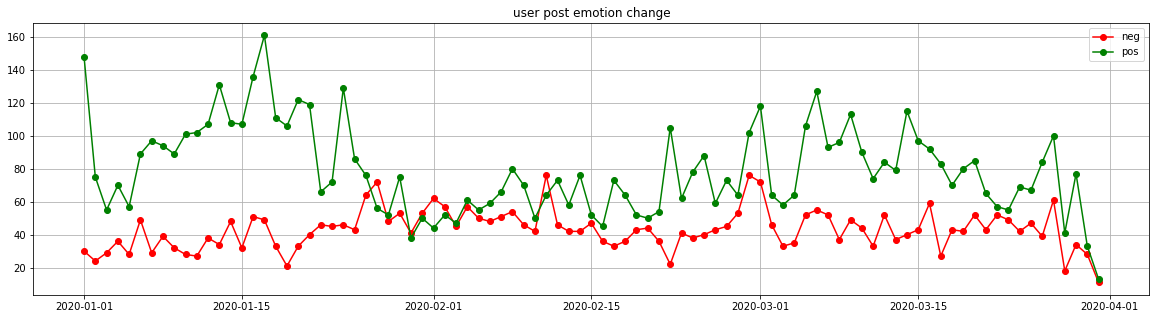

In [13]:
fig_emo, ax_emo = plt.subplots(figsize=(20, 5))
ax_emo.set_title("user post emotion change")
ax_emo.plot(data[data["emotion"] < 0.5].groupby("time").count()["post"], "ro-", label="neg")
ax_emo.plot(data[data["emotion"] >= 0.5].groupby("time").count()["post"], "go-", label="pos")
ax_emo.grid()
ax_emo.legend(loc="best")
plt.savefig("../data/chart_pres_data/user_emotion_change.png", dpi=400, bbox_inches='tight')

## 制作高频词词云

In [14]:
data["post"] = data["post"].apply(lambda x: " ".join(preprocess.cut(x)))

In [15]:
# get all kinds of vocabulary
def get_vocab(vocab_path):
    vacab = set()
    with open(vocab_path, encoding="utf-8") as f:
        vocab_list = [x.strip() for x in f.readlines()]
        vacab = set(vocab_list)
    return vacab

In [16]:
# load stop words
stopwords = get_vocab(stop_words_path)

In [17]:
def gen_wordcloud(text, save_to_file):
    wc = WordCloud(font_path=font_path, width=1000, height=860, scale=2, max_words=100, stopwords=stopwords, background_color="white", collocations=False).generate(text)
    wc.to_file(save_to_file)
    plt.imshow(wc)
    plt.axis("off")

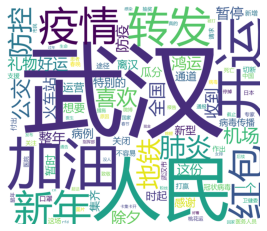

In [18]:
# generate wordcloud by date
date = "2020-1-23"
gen_wordcloud(data.groupby("time")["post"].sum()[pd.to_datetime(date).date()], os.path.join("../data/wordcloud", "user_" + date + ".png"))

## 获取情绪高频词

In [19]:
positive_words = get_vocab(positive_words_path)
negative_words = get_vocab(negative_words_path)

In [20]:
from collections import Counter
postwords_list = data[data["is_original"]==True].groupby("time")["post"].sum()[pd.to_datetime("2020-1-23").date()].split()
pos_words_list = [word for word in postwords_list if word in positive_words]
neg_words_list = [word for word in postwords_list if word in negative_words]
pos_counter = Counter(pos_words_list)
pos_counter.most_common(10)

[('好运', 23),
 ('喜欢', 21),
 ('特别的', 21),
 ('平安', 8),
 ('健康', 4),
 ('惊喜', 2),
 ('幸运', 1),
 ('希望', 1),
 ('最高的', 1),
 ('轻松', 1)]

In [21]:
neg_counter = Counter(neg_words_list)
neg_counter.most_common(10)

[('瓜分', 21),
 ('不是', 2),
 ('何必', 2),
 ('看不惯', 2),
 ('骄傲', 1),
 ('不知道', 1),
 ('疯狂', 1),
 ('争论', 1),
 ('论战', 1),
 ('差别', 1)]